In [1]:
#Importing relevant libraries
import numpy as np #linear algebra
import pandas as pd #data manipulation
import matplotlib.pyplot as plt #data viz
from matplotlib.gridspec import GridSpec #data viz
import seaborn as sns #data viz
import warnings #warnings
warnings.filterwarnings('ignore') #Hides warning popups
from plotly import express as px
import plotly.graph_objects as go

In [2]:
#dive really really deep into individual biological indicators
#use correlation to find out relations between vsribales
#cite sources

# Introduction

The dataset used in this EDA project has been sourced from the UCI Machine Learning Repository. It is a public dataset. It contains columns which are all biological metrics and indicators which can be used for predicting whether or not a person has a liver disease. Similar to how blood sugar levels can indicate diabetes, this dataset has the amount of certain proteins and amino acids in the patient's blood. These levels can detect the presence or absence of liver diseases like hepatitis and cirrhosis if a machine learning model is trained using them. Obviously, this would be a classification type ML problem.

The scope of this project is limited to exploratory data analysis of the .csv file. It is the first and most important step in any artificial intelligence project. 

In this project, I have undertaken the following steps:

-> Data Sourcing

-> Data Describing and Cleaning

-> Univariate Analysis

-> Bivariate Analysis

-> Multivariate Analysis

-> Statistical Analysis

-> Data Visualisations

# Data Describing and Cleaning

In [3]:
#Reading the dataset
data = pd.read_csv(r'C:\Users\white\Downloads\hcvdat0.csv')

Subsequent cells are for understanding the data.

In [4]:
data.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [5]:
data.shape

(615, 14)

In [6]:
data.head()

Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7

In [7]:
data = data.drop(data.columns[[0]], axis = 1)

Index columns are considered redundant and are always removed from the data.

In [8]:
data.tail()

Category  Age Sex   ALB    ALP    ALT    AST   BIL   CHE  CHOL  CREA  \
610  3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0  5.57  6.30  55.7   
611  3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0  1.54  3.02  63.0   
612  3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0  1.66  3.63  66.7   
613  3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0  3.56  4.20  52.0   
614  3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0  9.07  5.30  67.0   

       GGT  PROT  
610  650.9  68.5  
611   35.9  71.3  
612   64.2  82.0  
613   50.0  71.0  
614   34.0  68.0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


Category and Sex are nominal continuous categorical variables. All the other columns are numeric.

Category: The target feature. This would be used as in the ML project as various categories to classify people into the following.

'0=Blood Donor',' 0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'

Blood donor refers to people who can safely donate blood.

Hepatitis, Fibrosis and Cirrhosis are all malconditions of the liver; obviously can't donate blood with these conditions.

Age: age of the patient 

Sex: sex of the patient ('f'=female, 'm'=male)

ALB: amount of albumin in patient's blood

ALP: amount of alkaline phosphatase in patient's blood

ALT: amount of alanine transaminase in patient's blood

AST: amount of aspartate aminotransferase in patient's blood

BIL: amount of bilirubin in patient's blood

CHE: amount of cholinesterase in patient's blood

CHOL: amount of cholesterol in patient's blood

CREA: amount of creatine in patient's blood

GGT: amount of gamma-glutamyl transferase in patient's blood

PROT: amount of protien in patient's blood

In [10]:
data.describe()

Age         ALB         ALP         ALT         AST         BIL  \
count  615.000000  614.000000  597.000000  614.000000  615.000000  615.000000   
mean    47.408130   41.620195   68.283920   28.450814   34.786341   11.396748   
std     10.055105    5.780629   26.028315   25.469689   33.090690   19.673150   
min     19.000000   14.900000   11.300000    0.900000   10.600000    0.800000   
25%     39.000000   38.800000   52.500000   16.400000   21.600000    5.300000   
50%     47.000000   41.950000   66.200000   23.000000   25.900000    7.300000   
75%     54.000000   45.200000   80.100000   33.075000   32.900000   11.200000   
max     77.000000   82.200000  416.600000  325.300000  324.000000  254.000000   

              CHE        CHOL         CREA         GGT        PROT  
count  615.000000  605.000000   615.000000  615.000000  614.000000  
mean     8.196634    5.368099    81.287805   39.533171   72.044137  
std      2.205657    1.132728    49.756166   54.661071    5.402636  
min      1.420000    1.430000     8.000000    4.500000   44.800000  
25%      6.935000    4.610000    67.000000   15.700000   69.300000  
50%      8.260000    5.300000    77.000000   23.300000   72.200000  
75%      9.590000    6.060000    88.000000   40.200000   75.400000  
max     16.410000    9.670000  1079.100000  650.900000   90.000000

Changing the Category column and Sex column from the object datatype to the category datatype so that they can be relevantly used in the EDA.

In [11]:
data['Category'] = data['Category'].astype('category') 
data['Sex'] = data["Sex"].astype('category')

In [12]:
data['Category'].unique()

['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
Categories (5, object): ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']

In [13]:
data['Sex'].unique()

['m', 'f']
Categories (2, object): ['m', 'f']

<AxesSubplot:xlabel='count', ylabel='Sex'>

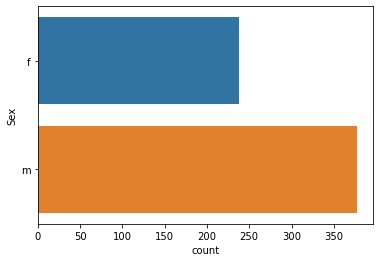

In [14]:
sns.countplot(y='Sex', data=data)

There are more males than females in the dataset. Whether more men will have the disease is something we still need to find out.

In [15]:
fig = go.Figure(px.box(data, y = 'Age', title = 'Box Plot of Age'))
fig.update_layout(title_x=0.5)
fig.show()

This will not be removed since a 77 is a valid age, and not a mistake in data entry.

In [16]:
fig = go.Figure(px.box(data, y = 'ALB', title = 'Box Plot of ALB'))
fig.update_layout(title_x=0.5)
fig.show()

The above 'ALB' or blood albumin column shows a lot of outliers. However, I want to consider that this dataset contains the 'Healthy' category too. So, what lies within the interquartile range might just be the the blood albumin values for all the healthy people. And the outliers may be the values for the diseased people. If I delete the values, I might lose the data of all the people of hepatitis positive patients and left with a dataset of only healthy people. 

In most datasets, outliers are considered to be detrimental to the analysis of data and the goal of deriving valuable conclusions from it. In this dataset, however, what could be considered as outliers, like very high bilirubin or very high ages or protein levels are actually very important to the analysis since they can indicate whether or not certain certain abnormalities are indicative of disease, which they mostly are. That is why, even though outliers are present in the data, I will not remove or impute them.

Therefore, I will not delete values for this, or any other biological indicator in the dataset.

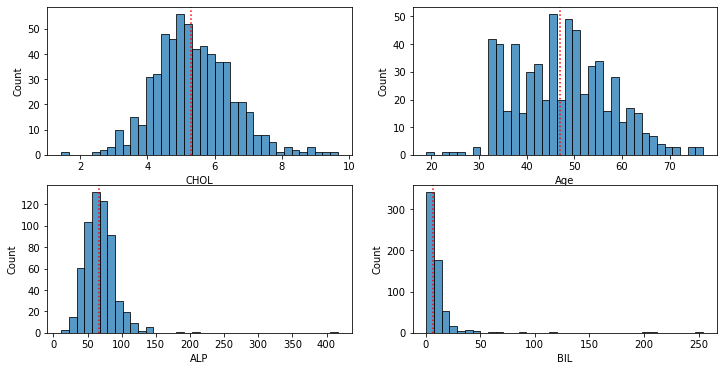

In [17]:
fig, ax = plt.subplots(2,2, figsize=(12, 6))

sns.histplot(ax=ax[0,0], data=data, x='CHOL', bins=36)
ax[0,0].axvline(x=data.CHOL.median(), color='red', linestyle=':')


sns.histplot(ax=ax[0,1], data=data, x='Age', bins=36)
ax[0,1].axvline(x=data.Age.median(), color='red', linestyle=':')

sns.histplot(ax=ax[1,0], data=data, x='ALP', bins=36)
ax[1,0].axvline(x=data.ALP.median(), color='red', linestyle=':')

sns.histplot(ax=ax[1,1], data=data, x='BIL', bins=36)
ax[1,1].axvline(x=data.BIL.median(), color='red', linestyle=':')

plt.show()


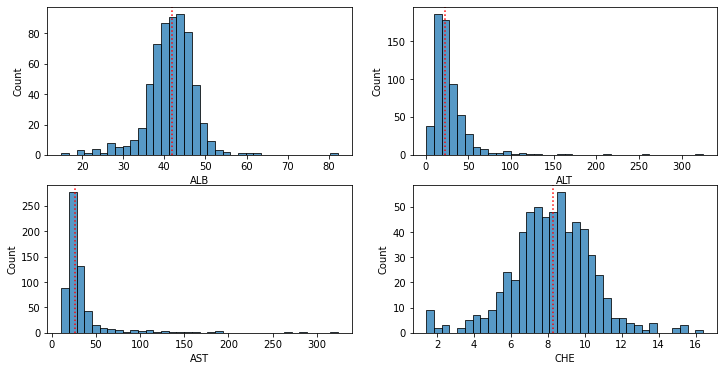

In [18]:
fig, ax = plt.subplots(2,2, figsize=(12, 6))

sns.histplot(ax=ax[0,0], data=data, x='ALB', bins=36)
ax[0,0].axvline(x=data.ALB.median(), color='red', linestyle=':')


sns.histplot(ax=ax[0,1], data=data, x='ALT', bins=36)
ax[0,1].axvline(x=data.ALT.median(), color='red', linestyle=':')

sns.histplot(ax=ax[1,0], data=data, x='AST', bins=36)
ax[1,0].axvline(x=data.AST.median(), color='red', linestyle=':')

sns.histplot(ax=ax[1,1], data=data, x='CHE', bins=36)
ax[1,1].axvline(x=data.CHE.median(), color='red', linestyle=':')

plt.show()

Some columns seem to follow the normal distribution while others don't.

In [19]:
import plotly.express as px
count = data.Category.value_counts()
#print(count) #checking for legend
colors=px.colors.sequential.Rainbow
fig = px.pie(count, names=['Blood Donor', 'Cirrhosis', 'Hepatitis', 'Fibrosis', 'suspect Blood Donor'], values=count.values, color_discrete_sequence=colors)
fig.show()

# Liver Diseases: Hepatitis, Cirrhosis, Fibrosis

## Hepatitis

Hepatitis is inflammation of the liver tissue. Some people or animals with hepatitis have no symptoms, whereas others develop yellow discoloration of the skin and whites of the eyes (jaundice), poor appetite, vomiting, tiredness, abdominal pain, and diarrhea. Hepatitis is acute if it resolves within six months, and chronic if it lasts longer than six months. Acute hepatitis can resolve on its own, progress to chronic hepatitis, or (rarely) result in acute liver failure. Chronic hepatitis may progress to scarring of the liver (cirrhosis), liver failure, and liver cancer.

Hepatitis is most commonly caused by the virus hepatovirus A, B, C, D, and E. Other common causes of hepatitis include heavy alcohol use, certain medications, toxins, other infections, autoimmune diseases, and non-alcoholic steatohepatitis (NASH). Hepatitis A and E are mainly spread by contaminated food and water. Hepatitis B is mainly sexually transmitted, but may also be passed from mother to baby during pregnancy or childbirth and spread through infected blood. Hepatitis C is commonly spread through infected blood such as may occur during needle sharing by intravenous drug users. Hepatitis D can only infect people already infected with hepatitis B.

Hepatitis A, B, and D are preventable with immunization. Medications may be used to treat chronic viral hepatitis. Antiviral medications are recommended in all with chronic hepatitis C, except those with conditions that limit their life expectancy. There is no specific treatment for NASH; physical activity, a healthy diet, and weight loss are recommended. Autoimmune hepatitis may be treated with medications to suppress the immune system. A liver transplant may be an option in both acute and chronic liver failure.

## Cirrhosis

Cirrhosis, also known as liver cirrhosis or hepatic cirrhosis, and end-stage liver disease, is the impaired liver function caused by the formation of scar tissue known as fibrosis due to damage caused by liver disease.Damage causes tissue repair and subsequent formation of scar tissue, which over time can replace normal functioning tissue, leading to the impaired liver function of cirrhosis. Early symptoms may include tiredness, weakness, loss of appetite, unexplained weight loss, nausea and vomiting, and discomfort in the right upper quadrant of the abdomen.As the disease worsens, symptoms may include itchiness, swelling in the lower legs, fluid build-up in the abdomen, jaundice, bruising easily, and the development of spider-like blood vessels in the skin. The fluid build-up in the abdomen may become spontaneously infected.

Cirrhosis is most commonly caused by alcoholic liver disease, non-alcoholic steatohepatitis (NASH – the progressive form of non-alcoholic fatty liver disease), heroin abuse, chronic hepatitis B, and chronic hepatitis C. Heavy drinking over a number of years can cause alcoholic liver disease. Liver damage has also been attributed to heroin usage over an extended period of time as well. NASH has a number of causes, including obesity, high blood pressure, abnormal levels of cholesterol, type 2 diabetes, and metabolic syndrome. Less common causes of cirrhosis include autoimmune hepatitis, primary biliary cholangitis, and primary sclerosing cholangitis that disrupts bile duct function, genetic disorders such as Wilson's disease and hereditary hemochromatosis, and chronic heart failure with liver congestion.

Diagnosis is based on blood tests, medical imaging, and liver biopsy.

As cirrhosis progresses, symptoms can include neurological changes. This can consist of cognitive impairments, confusion, memory loss, sleep disorders, and personality changes.

Worsening cirrhosis can cause a build-up of fluid in different parts of the body such as the legs (edema) and abdomen (ascites). Other signs of advancing disease include itchy skin, bruising easily, dark urine, and yellowing of the skin.

## Fibrosis

Liver fibrosis occurs when the healthy tissue of your liver becomes scarred and therefore cannot work as well. Fibrosis is the first stage of liver scarring. Later, if more of the liver becomes scarred, it’s known as liver cirrhosis.

While some animal studies have shown the potential for the liver to regenerate or heal itself, once liver damage is done in humans, the liver doesn’t usually heal. However, medications and lifestyle changes can help to keep fibrosis from getting worse.

When a person does progress in their liver disease, they may experience symptoms that include:

-> appetite loss

-> difficulty thinking clearly

-> fluid buildup in the legs or stomach

-> jaundice (where the skin and eyes appear yellow)

-> nausea

-> unexplained weight loss

-> weakness

Liver fibrosis occurs after a person experiences injury or inflammation in the liver. The liver’s cells stimulate wound healing. During this wound healing, excess proteins such as collagen and glycoproteins build up in the liver. Eventually, after many instances of repair, the liver cells (known as hepatocytes) can no longer repair themselves. The excess proteins form scar tissue or fibrosis.

Several types of liver diseases exist that can cause fibrosis. These include:

-> autoimmune hepatitis

-> biliary obstruction

-> iron overload

-> nonalcoholic fatty liver disease, which includes nonalcoholic fatty liver (NAFL) and nonalcoholic steatohepatitis (NASH)

-> viral hepatitis B and C

-> alcoholic liver disease

-> the most common cause of liver fibrosis is nonalcoholic fatty liver disease (NAFLD), while the second is alcoholic liver disease due to long-term excesses of drinking alcohol.

In [20]:
data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

<BarContainer object of 5 artists>

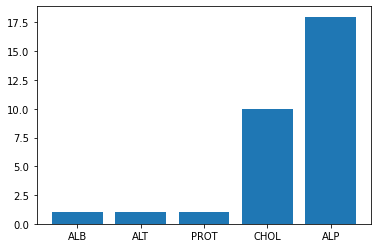

In [21]:
#Plotting the number of null values by column (only columns with > 0 null values are considered)
null_data = data.isnull().sum()[data.isnull().sum() > 0].sort_values()
plt.bar(null_data.index, null_data.values)

In [22]:
#Row-wise null count here
data.isnull().sum(axis = 1)

0      0
1      0
2      0
3      0
4      0
      ..
610    0
611    0
612    0
613    1
614    1
Length: 615, dtype: int64

In [23]:
# Column-wise null percentages here, rounded off to two decimal places, as instructed
round(data.isnull().sum() / data.shape[0] * 100, 2)

Category    0.00
Age         0.00
Sex         0.00
ALB         0.16
ALP         2.93
ALT         0.16
AST         0.00
BIL         0.00
CHE         0.00
CHOL        1.63
CREA        0.00
GGT         0.00
PROT        0.16
dtype: float64

Since all but two columns in the dataset contain numeric values, I thought it would be a good idea to get an insight into what pattenrns the numeric columns follow. 

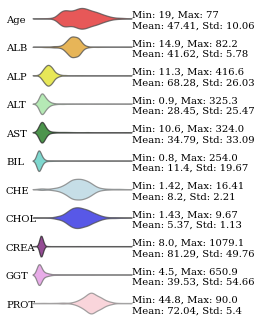

In [24]:
fig = plt.figure(figsize = (14,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=16, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
ax1_1 = fig.add_subplot(gs[1:2, 1:4]) #top left
ax1_2 = fig.add_subplot(gs[2:3, 1:4])
ax1_3 = fig.add_subplot(gs[3:4, 1:4])
ax1_4 = fig.add_subplot(gs[4:5, 1:4])
ax1_5 = fig.add_subplot(gs[5:6, 1:4])
ax1_6 = fig.add_subplot(gs[6:7, 1:4])
ax1_7 = fig.add_subplot(gs[7:8, 1:4])
ax1_8 = fig.add_subplot(gs[8:9, 1:4])
ax1_9 = fig.add_subplot(gs[9:10, 1:4])
ax1_10 = fig.add_subplot(gs[10:11, 1:4])
ax1_11 = fig.add_subplot(gs[11:12, 1:4])
axes = [ ax1_1, ax1_2, ax1_3, ax1_4, ax1_5, ax1_6,
        ax1_7, ax1_8, ax1_9, ax1_10, ax1_11]
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green', 'turquoise', 'lightblue',
          'blue', 'purple', 'violet', 'pink']
y = 0.805
for ax, color, column in zip(axes, colors, list(data.describe().columns)):
    sns.violinplot(x=column, y=None, data=data, ax=ax, inner=None, color=color)
    ax.collections[::2][0].set_alpha(0.75)
    fig.text(0.07, y, column,
            {'font':'Serif','color': 'black', 'size':12})
    stats_text = "Min: {}, Max: {}\nMean: {}, Std: {}".format(round(data[column].min(), 2),
                                                              round(data[column].max(), 2),
                                                              round(data[column].mean(), 2),
                                                              round(data[column].std(), 2))
    fig.text(0.22, y-0.01, stats_text,
            {'font':'Serif', 'weight':'normal','color': 'black', 'size':12})
    y-=0.0475

Most of the columns follow a normal distribution, the bell shape is apparent from the violin plots above. That most columns have abnormally large values is apparent. Normally they would be considered outliers and removed. But due to me not being knowledgeabe about this subject of diseases, I do not wish to take the liberty of making unwarranted assumptions. I will let the values remain.

Null value percentages in most columns are 0, and very low in others. It does not make sense to delete any columns for this reason.
To speak of rows with null values, even if information about one biological indicator is absent, other metrics can be used to predict whether the disease is there or not which is why I will not try to remove these either.

I will now have a look at what medical significance each column has as 'CHE', 'BIL' are all alien to me. 

# Univariate Analysis

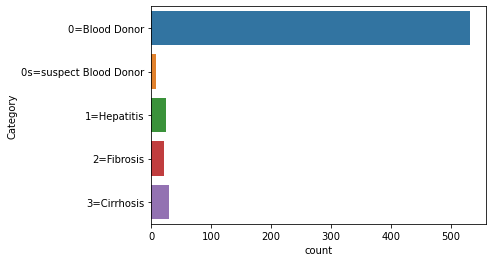

In [25]:
sns.countplot(y='Category', data = data)
plt.show()

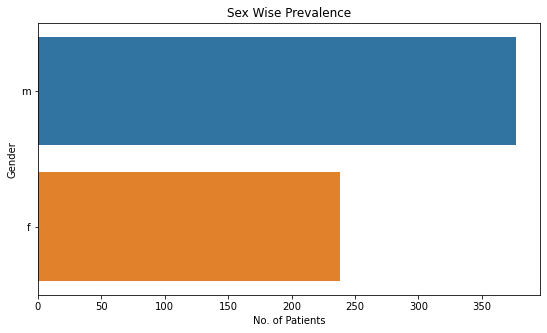

In [26]:
#Plotting a horizontal bar chart for identifying sex wise prevalence of symptoms
sex = data['Sex'].value_counts().index
plt.figure(figsize=(9, 5))
sns.countplot(data=data, y='Sex', order=sex)
plt.title('Sex Wise Prevalence')
plt.xlabel('No. of Patients')
plt.ylabel('Gender');

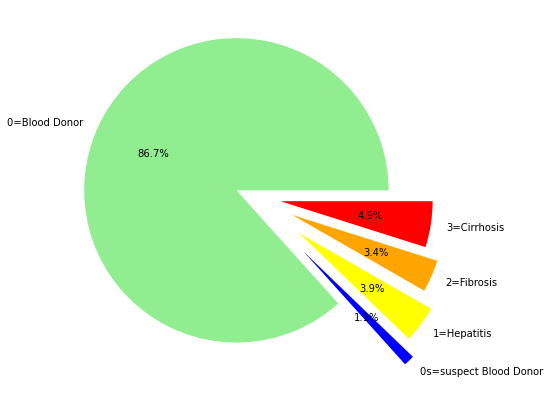

In [27]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data.groupby('Category').Category.count().values, 
                   labels=data.groupby('Category').Category.count().index,
                    autopct='%1.1f%%', explode=[0.1, 0.5, 0.4, 0.3, 0.2], 
                   colors=['lightgreen', 'blue', 'yellow', 'orange', 'red'])
 
# show plot
plt.show()

In [28]:
target_map = {'0=Blood Donor': 'Healthy',
             '0s=suspect Blood Donor': 'Healthy', #suspects have been binned with blood donors for simplicity
             '1=Hepatitis': 'Hepatitis',
             '2=Fibrosis': 'Fibrosis',
             '3=Cirrhosis': 'Cirrhosis'}

data['Category'] = data.Category.map(target_map) 

This has been done to introduce some simplicity and reduce some redundancy. The Category column in the dataset now has two categories merged into one, i.e., 0 and 0s into 'Healthy'.

Multiple kernel distribution plots used to check how cases of being healthy or not are distributed across ages. They have also been superimposed for giving multiple concluions through a single graph.

Text(0.5, 0, 'Age')

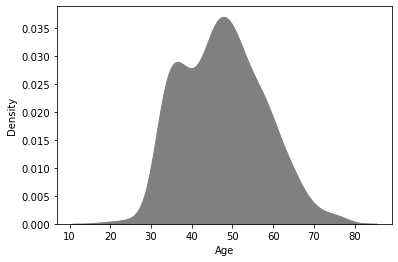

In [29]:
fig1 = sns.kdeplot('Age', data=data, shade=True, color='grey', alpha=1)
fig1.set_xlabel('Age', {'color':'black'})

Text(0.5, 0, 'Age')

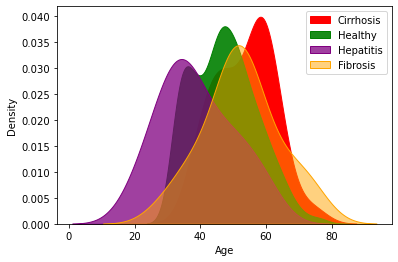

In [30]:
g = sns.kdeplot('Age', data=data[data.Category=='Cirrhosis'],shade=True, color='red', alpha=1, label='Cirrhosis')
h = sns.kdeplot('Age', data=data[data.Category=='Healthy'], shade=True, color='green', alpha=0.9, label='Healthy')
i = sns.kdeplot('Age', data=data[data.Category=='Hepatitis'],  shade=True, color='purple', alpha=0.75, label='Hepatitis')
j = sns.kdeplot('Age', data=data[data.Category=='Fibrosis'],  shade=True, color='orange', alpha=0.5, label='Fibrosis')

g.legend()
g.set_xlabel('Age', {'color':'black'})

One can clearly see, hepatitis affects the younger people, approximately between 20 and 35. 

Cirrhosis is seen significantly increasing after 55.

Fibrosis affects, most significantly, people aged 50.

Text(0.5, 0, 'Albumin Level')

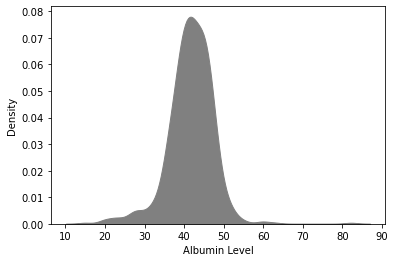

In [31]:
fig2 = sns.kdeplot('ALB', data=data, shade=True, color='grey', alpha=1)
fig2.set_xlabel('Albumin Level', {'color':'black'})

Text(0.5, 0, 'Albumin Level')

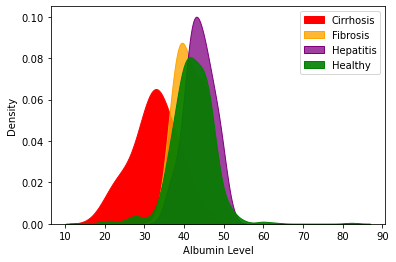

In [32]:
g = sns.kdeplot('ALB', data=data[data.Category=='Cirrhosis'],  shade=True, color='red', alpha=1, label='Cirrhosis')
h = sns.kdeplot('ALB', data=data[data.Category=='Fibrosis'],  shade=True, color='orange', alpha=0.8, label='Fibrosis')
i = sns.kdeplot('ALB', data=data[data.Category=='Hepatitis'],  shade=True, color='purple', alpha=0.75, label='Hepatitis')
j = sns.kdeplot('ALB', data=data[data.Category=='Healthy'],  shade=True, color='green', alpha=0.9, label='Healthy')


g.legend()
g.set_xlabel('Albumin Level', {'color':'black'})

A low albumin level is directly resultant in cirrhosis.
Albumin above 30 but below 40 results in fibrosis.

Text(0.5, 0, 'Alkaline Phosphatase Level')

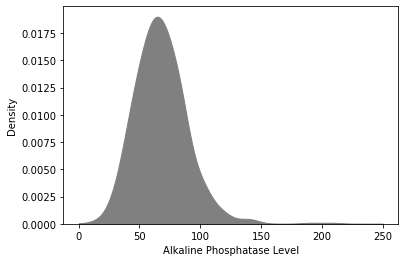

In [33]:
f = sns.kdeplot('ALP', data=data, shade=True, color='grey', alpha=1, clip=[0, 250])
f.set_xlabel('Alkaline Phosphatase Level', { 'color':'black'})

Text(0.5, 0, 'Alkaline Phosphatase Level')

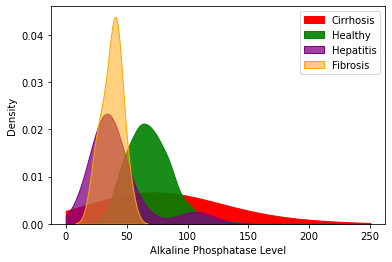

In [34]:
p = sns.kdeplot('ALP', data=data[data.Category=='Cirrhosis'], shade=True, color='red', 
            alpha=1, label='Cirrhosis', clip=[0, 250])
q = sns.kdeplot('ALP', data=data[data.Category=='Healthy'],  shade=True, color='green', 
            alpha=0.9, label='Healthy', clip=[0, 250])
r = sns.kdeplot('ALP', data=data[data.Category=='Hepatitis'],  shade=True, color='purple', 
            alpha=0.75, label='Hepatitis', clip=[0, 250])
s = sns.kdeplot('ALP', data=data[data.Category=='Fibrosis'], shade=True, color='orange', 
            alpha=0.5, label='Fibrosis', clip=[0, 250])

p.legend()
p.set_xlabel('Alkaline Phosphatase Level', { 'color':'black'})

A low alkaline phosphatase value indicates liver disease: both hepatitis and fibrosis.

Text(0.5, 0, 'Alanine Transaminase Level')

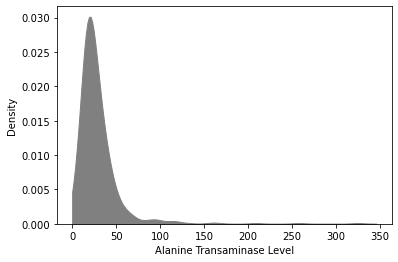

In [35]:
o = sns.kdeplot('ALT', data=data, shade=True, color='grey', alpha=1, clip=[0,500])
o.set_xlabel('Alanine Transaminase Level', { 'color':'black'})

Text(0.5, 0, 'Alanine Transaminase Level')

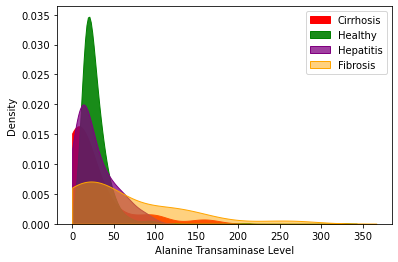

In [36]:
p = sns.kdeplot('ALT', data=data[data.Category=='Cirrhosis'],  shade=True, color='red', 
            alpha=1, label='Cirrhosis', clip=[0,500])
q = sns.kdeplot('ALT', data=data[data.Category=='Healthy'],  shade=True, color='green', 
            alpha=0.9, label='Healthy', clip=[0,500])
r = sns.kdeplot('ALT', data=data[data.Category=='Hepatitis'],  shade=True, color='purple', 
            alpha=0.75, label='Hepatitis', clip=[0,500])
s = sns.kdeplot('ALT', data=data[data.Category=='Fibrosis'],  shade=True, color='orange', 
            alpha=0.5, label='Fibrosis', clip=[0,500])

p.legend()
p.set_xlabel('Alanine Transaminase Level', {'color':'black'})

Most healthy people have ALP between 0 and 50. 
A clear demarcation towards the diseases can be seen with high Alanine Transaminase levels with prevalence of both fibrosis and cirrhosis.

Text(0.5, 0, 'Aspartate Aminotransferase Level')

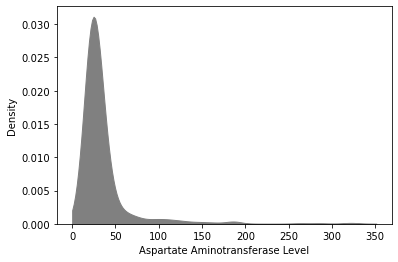

In [37]:
g = sns.kdeplot('AST', data=data,shade=True, color='grey', alpha=1, clip=[0,400])
g.set_xlabel('Aspartate Aminotransferase Level', { 'color':'black'})

Text(0.5, 0, 'Aspartate Aminotransferase Level')

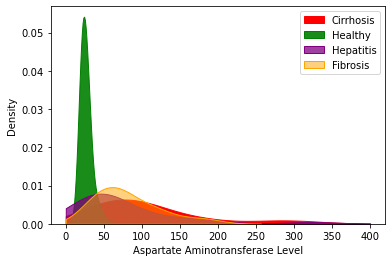

In [38]:
p = sns.kdeplot('AST', data=data[data.Category=='Cirrhosis'], shade=True, color='red', 
            alpha=1, label='Cirrhosis', clip=[0,400])
q = sns.kdeplot('AST', data=data[data.Category=='Healthy'],  shade=True, color='green', 
            alpha=0.9, label='Healthy', clip=[0,400])
r = sns.kdeplot('AST', data=data[data.Category=='Hepatitis'], shade=True, color='purple', 
            alpha=0.75, label='Hepatitis', clip=[0,400])
s = sns.kdeplot('AST', data=data[data.Category=='Fibrosis'], shade=True, color='orange', 
            alpha=0.5, label='Fibrosis', clip=[0,400])

p.legend()
p.set_xlabel('Aspartate Aminotransferase Level', { 'color':'black'})

High aspartate aminotransferase levels, particularly above 50, indicate liver diseases.

Text(0.5, 0, 'Bilirubin Level')

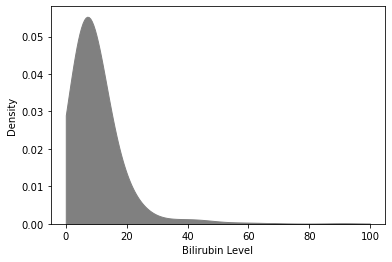

In [39]:
n = sns.kdeplot('BIL', data=data, shade=True, color='grey', alpha=1, clip=[0,100])
n.set_xlabel('Bilirubin Level', { 'color':'black'})

Text(0.5, 0, 'Bilirubin Level')

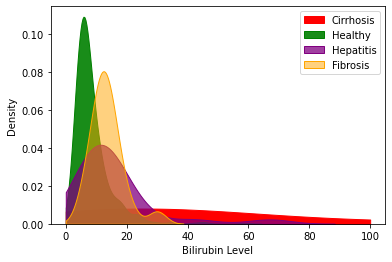

In [40]:
p = sns.kdeplot('BIL', data=data[data.Category=='Cirrhosis'],  shade=True, color='red', 
            alpha=1, label='Cirrhosis', clip=[0,100])
q = sns.kdeplot('BIL', data=data[data.Category=='Healthy'],  shade=True, color='green', 
            alpha=0.9, label='Healthy', clip=[0,100])
r = sns.kdeplot('BIL', data=data[data.Category=='Hepatitis'],  shade=True, color='purple', 
            alpha=0.75, label='Hepatitis', clip=[0,100])
s = sns.kdeplot('BIL', data=data[data.Category=='Fibrosis'],  shade=True, color='orange', 
            alpha=0.5, label='Fibrosis', clip=[0,100])

p.legend()
p.set_xlabel('Bilirubin Level', {'color':'black'})


High bilirubin levels indicate liver problems. 

Text(0.5, 0, 'Cholinesterase Level')

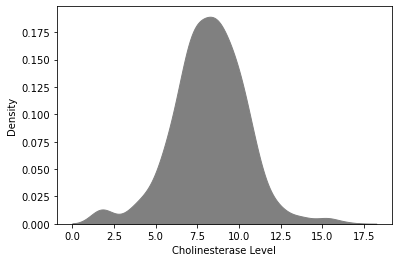

In [41]:
l = sns.kdeplot('CHE', data=data,  shade=True, color='grey', alpha=1, clip=[0,400])
l.set_xlabel('Cholinesterase Level', { 'color':'black'})


Text(0.5, 0, 'Cholinesterase Level')

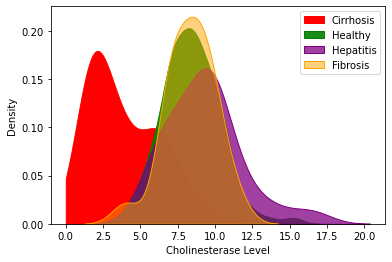

In [42]:
p = sns.kdeplot('CHE', data=data[data.Category=='Cirrhosis'],  shade=True, color='red', 
            alpha=1, label='Cirrhosis', clip=[0,400])
q = sns.kdeplot('CHE', data=data[data.Category=='Healthy'], shade=True, color='green', 
            alpha=0.9, label='Healthy', clip=[0,400])
r = sns.kdeplot('CHE', data=data[data.Category=='Hepatitis'],  shade=True, color='purple', 
            alpha=0.75, label='Hepatitis', clip=[0,400])
s = sns.kdeplot('CHE', data=data[data.Category=='Fibrosis'],  shade=True, color='orange', 
            alpha=0.5, label='Fibrosis', clip=[0,400])

p.legend()
p.set_xlabel('Cholinesterase Level', { 'color':'black'})

Cholinesterase levels overlap in healthy, hepatitis and fibrosis cases. But CHE is extremely low for cirrhosis patients which clearly that low CHE is a foolproof indicator of cirrhosis.

Text(0.5, 0, 'Cholesterol Level')

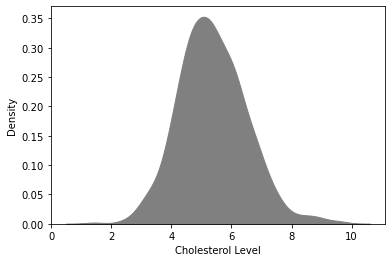

In [43]:
c = sns.kdeplot('CHOL', data=data,  shade=True, color='grey', alpha=1, clip=[0,400])
c.set_xlabel('Cholesterol Level', { 'color':'black'})

Text(0.5, 0, 'Cholesterol Level')

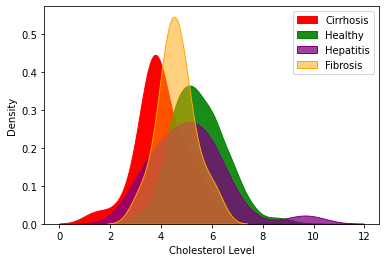

In [44]:
p = sns.kdeplot('CHOL', data=data[data.Category=='Cirrhosis'],  shade=True, color='red', 
            alpha=1, label='Cirrhosis', clip=[0,400])
q = sns.kdeplot('CHOL', data=data[data.Category=='Healthy'],  shade=True, color='green', 
            alpha=0.9, label='Healthy', clip=[0,400])
r = sns.kdeplot('CHOL', data=data[data.Category=='Hepatitis'],  shade=True, color='purple', 
            alpha=0.75, label='Hepatitis', clip=[0,400])
s = sns.kdeplot('CHOL', data=data[data.Category=='Fibrosis'], shade=True, color='orange', 
            alpha=0.5, label='Fibrosis', clip=[0,400])

p.legend()
p.set_xlabel('Cholesterol Level', { 'color':'black'})

Low cholesterol levels indicate liver problems like cirrhosis and fibrosis.

Text(0.5, 0, 'Creatine Level')

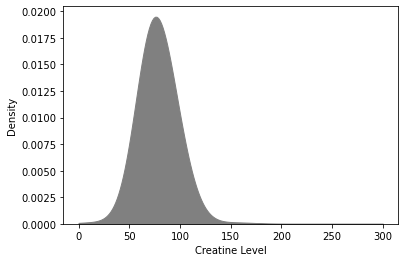

In [45]:
m = sns.kdeplot('CREA', data=data,  shade=True, color='grey', alpha=1, clip=[0,300])
m.set_xlabel('Creatine Level', { 'color':'black'})

Text(0.5, 0, 'Creatine Level')

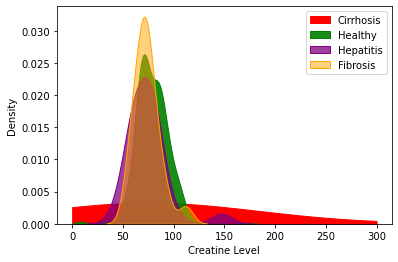

In [46]:
p= sns.kdeplot('CREA', data=data[data.Category=='Cirrhosis'],  shade=True, color='red', 
            alpha=1, label='Cirrhosis', clip=[0,300])
q = sns.kdeplot('CREA', data=data[data.Category=='Healthy'],  shade=True, color='green', 
            alpha=0.9, label='Healthy', clip=[0,300])
r = sns.kdeplot('CREA', data=data[data.Category=='Hepatitis'],  shade=True, color='purple', 
            alpha=0.75, label='Hepatitis', clip=[0,300])
s = sns.kdeplot('CREA', data=data[data.Category=='Fibrosis'],  shade=True, color='orange', 
            alpha=0.5, label='Fibrosis', clip=[0,300])

p.legend()
p.set_xlabel('Creatine Level', { 'color':'black'})

There is a complete overlap in the creatine amounts for healthy and diseases people in this case. Creatine is not an indicator of liver disease at all.

Text(0.5, 0, 'Gamma-Glutamyl Transferase Level')

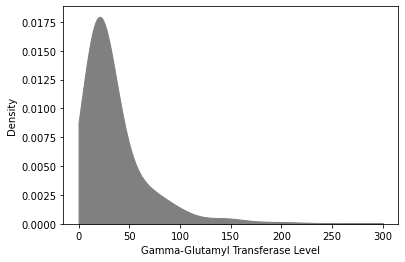

In [47]:
n = sns.kdeplot('GGT', data=data,  shade=True, color='grey', alpha=1, clip=[0,300])
n.set_xlabel('Gamma-Glutamyl Transferase Level', { 'color':'black'})

Text(0.5, 0, 'Gamma-Glutamyl Transferase Level')

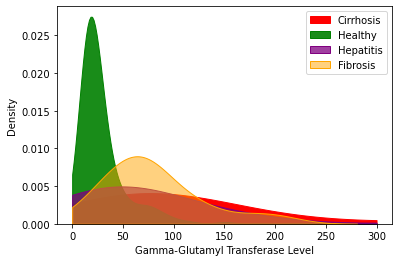

In [48]:
p = sns.kdeplot('GGT', data=data[data.Category=='Cirrhosis'],  shade=True, color='red', 
            alpha=1, label='Cirrhosis', clip=[0,300])
q = sns.kdeplot('GGT', data=data[data.Category=='Healthy'], shade=True, color='green', 
            alpha=0.9, label='Healthy', clip=[0,300])
r = sns.kdeplot('GGT', data=data[data.Category=='Hepatitis'],  shade=True, color='purple', 
            alpha=0.75, label='Hepatitis', clip=[0,300])
s = sns.kdeplot('GGT', data=data[data.Category=='Fibrosis'],  shade=True, color='orange', 
            alpha=0.5, label='Fibrosis', clip=[0,300])
p.legend()
p.set_xlabel('Gamma-Glutamyl Transferase Level', { 'color':'black'})

High Gamma-Glutamyl Transferase indicated liver disease, especially fibrosis.

Text(0.5, 0, 'Protein Level')

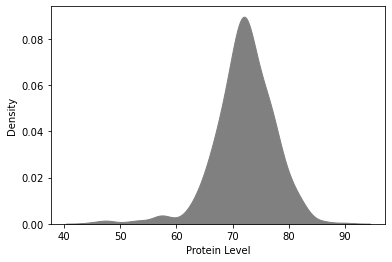

In [49]:
p = sns.kdeplot('PROT', data=data,  shade=True, color='grey', alpha=1, clip=[0,300])
p.set_xlabel('Protein Level', { 'color':'black'})

Text(0.5, 0, 'Protein Level')

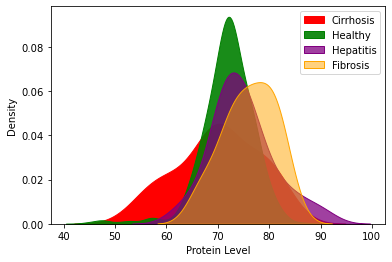

In [50]:
p = sns.kdeplot('PROT', data=data[data.Category=='Cirrhosis'],shade=True, color='red', 
            alpha=1, label='Cirrhosis', clip=[0,300])
q = sns.kdeplot('PROT', data=data[data.Category=='Healthy'],shade=True, color='green', 
            alpha=0.9, label='Healthy', clip=[0,300])
r = sns.kdeplot('PROT', data=data[data.Category=='Hepatitis'], shade=True, color='purple', 
            alpha=0.75, label='Hepatitis', clip=[0,300])
s = sns.kdeplot('PROT', data=data[data.Category=='Fibrosis'], shade=True, color='orange', 
            alpha=0.5, label='Fibrosis', clip=[0,300])

p.legend()
p.set_xlabel('Protein Level', {'color':'black'})

Protein levels cannot directly predict liver problems other than fibrosis.

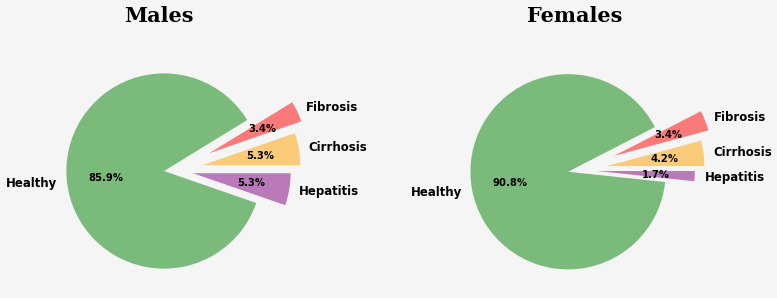

In [51]:
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=13, nrows=5, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[:, 0:5])
ax2 = fig.add_subplot(gs[:, 8:])


# axes list
axes = [ ax1,ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
        
ax1_plot = ax1.pie(data[data.Sex == 'm'].groupby('Category').Category.count().values, 
labels=data.groupby('Category').Category.count().index,
autopct='%1.1f%%', explode=[0.3,  0.4, 0.1, 0.2], 
colors=['orange', 'red', 'green', 'purple'])

for piece in ax1_plot[0]:
    piece.set_alpha(0.5)

for i, text in enumerate(ax1_plot[1]):
    text.set_weight('bold')
    text.set_size(14)

for i, text in enumerate(ax1_plot[2]):
    text.set_weight('bold')
    text.set_size(12)

    
fig.text(0.1, 0.75, 'Males',  {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
#------------------------------------------------------------    
#ax2
ax2_plot = ax2.pie(data[data.Sex == 'f'].groupby('Category').Category.count().values, 
                   labels=data.groupby('Category').Category.count().index,
                    autopct='%1.1f%%', explode=[0.3,  0.4, 0.1, 0.2], 
                   colors=['orange', 'red', 'green', 'purple'])
for piece in ax2_plot[0]:
    piece.set_alpha(0.5)

for i, text in enumerate(ax2_plot[1]):
    text.set_weight('bold')
    text.set_size(14)

for i, text in enumerate(ax2_plot[2]):
    text.set_weight('bold')
    text.set_size(12)

fig.text(0.38, 0.75, 'Females',  {'font':'Serif', 'weight':'bold','color': 'black', 'size':25}) 
plt.show()

Males are at a higher risk, specially for cirrhosis and hepatitis than women.

# Bivariate Analysis

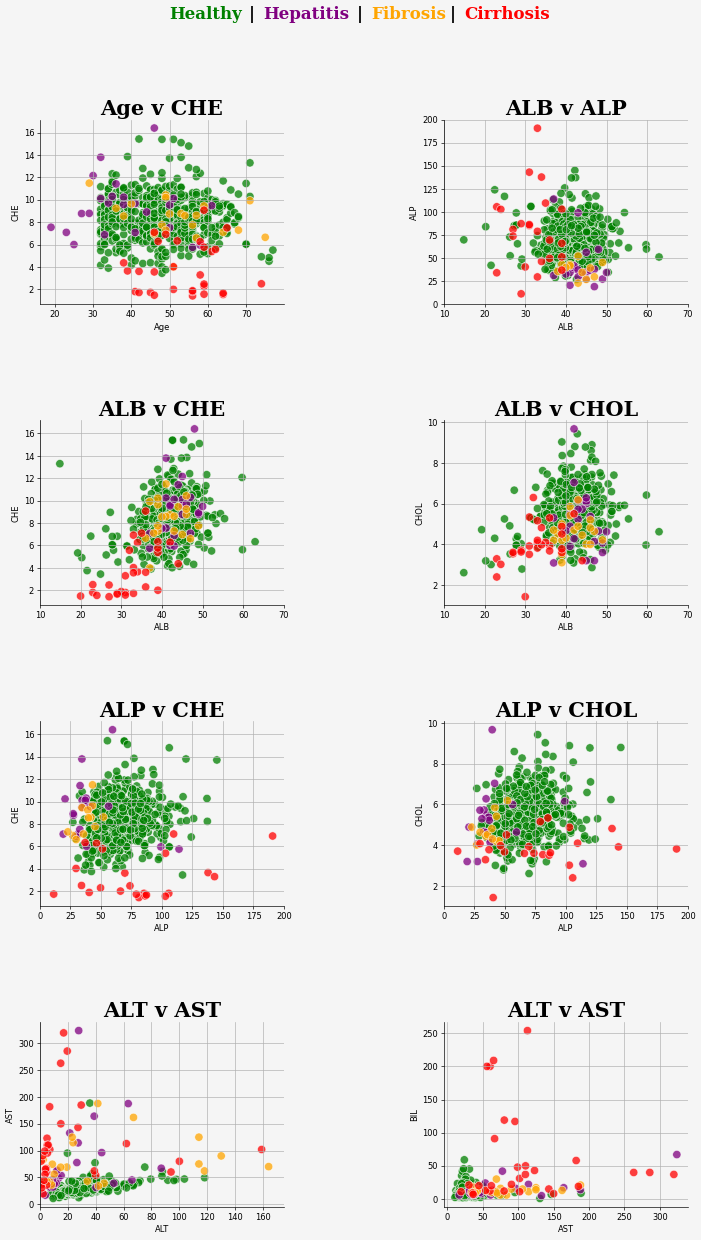

In [52]:
fig = plt.figure(figsize = (24,24), dpi = 60)
gs = GridSpec(ncols=13, nrows=29, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[:5, :5])
ax2 = fig.add_subplot(gs[:5, 8:])
ax3 = fig.add_subplot(gs[8:13, :5])
ax4 = fig.add_subplot(gs[8:13, 8:])
ax5 = fig.add_subplot(gs[16:21, :5])
ax6 = fig.add_subplot(gs[16:21, 8:])
ax7 = fig.add_subplot(gs[24:, :5])
ax8 = fig.add_subplot(gs[24:, 8:])


# axes list
axes = [ ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

for ax in axes:
    ax.set_facecolor('#f5f5f5')
    ax.grid()
    
    for loc in ['right', 'top']:
        ax.spines[loc].set_visible(False)
        
#ax1 Age v CHE
sns.scatterplot(x='Age', y='CHE', hue='Category', data=data, ax=ax1, s=100, alpha=0.75, legend=None)
ax1.set_title('Age v CHE', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
#-------------------------------------------------------------------------------
#ax2 ALB v ALP
sns.scatterplot(x='ALB', y='ALP', hue='Category', data=data, ax=ax2, s=100, alpha=0.75, legend=None)
ax2.set_title('ALB v ALP', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax2.set_xlim(10, 70)
ax2.set_ylim(0,200)
#-------------------------------------------------------------------------------
#ax3 ALB v CHE
sns.scatterplot(x='ALB', y='CHE', hue='Category', data=data, ax=ax3, s=100, alpha=0.75, legend=None)
ax3.set_title('ALB v CHE', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax3.set_xlim(10, 70)
#-------------------------------------------------------------------------------
#ax4 ALB v CHOL
sns.scatterplot(x='ALB', y='CHOL', hue='Category', data=data, ax=ax4, s=100, alpha=0.75, legend=None)
ax4.set_title('ALB v CHOL', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax4.set_xlim(10, 70)

#ax5 ALP v CHE
sns.scatterplot(x='ALP', y='CHE', hue='Category', data=data, ax=ax5, s=100, alpha=0.75, legend=None)
ax5.set_title('ALP v CHE', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax5.set_xlim(0, 200)
#-------------------------------------------------------------------------------
#ax6 ALP v CHOL
sns.scatterplot(x='ALP', y='CHOL', hue='Category', data=data, ax=ax6, s=100, alpha=0.75, legend=None)
ax6.set_title('ALP v CHOL', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax6.set_xlim(0, 200)
#-------------------------------------------------------------------------------
#ax7 ALT v AST
sns.scatterplot(x='ALT', y='AST', hue='Category', data=data, ax=ax7, s=100, alpha=0.75, legend=None)
ax7.set_title('ALT v AST', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax7.set_xlim(0, 175)
#-------------------------------------------------------------------------------
#ax8 AST v BIL
sns.scatterplot(x='AST', y='BIL', hue='Category', data=data, ax=ax8, s=100, alpha=0.75, legend=None)
ax8.set_title('ALT v AST', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
#ax8.set_xlim(0, 175)

fig.text(0.1 + 0.04, 0.95, "Healthy", 
         {'font':'Serif', 'weight':'bold','color': 'green', 'size':20})
fig.text(0.155 + 0.04, 0.95, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.165 + 0.04, 0.95, "Hepatitis", 
         {'font':'Serif', 'weight':'bold','color': 'purple', 'size':20})
fig.text(0.23 + 0.04, 0.95, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.24 + 0.04, 0.95, "Fibrosis", 
         {'font':'Serif', 'weight':'bold','color': 'orange', 'size':20})
fig.text(0.295 + 0.04, 0.95, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.305 + 0.04, 0.95, "Cirrhosis", 
         {'font':'Serif', 'weight':'bold','color': 'red', 'size':20})


plt.show()

Correlation Heatmap

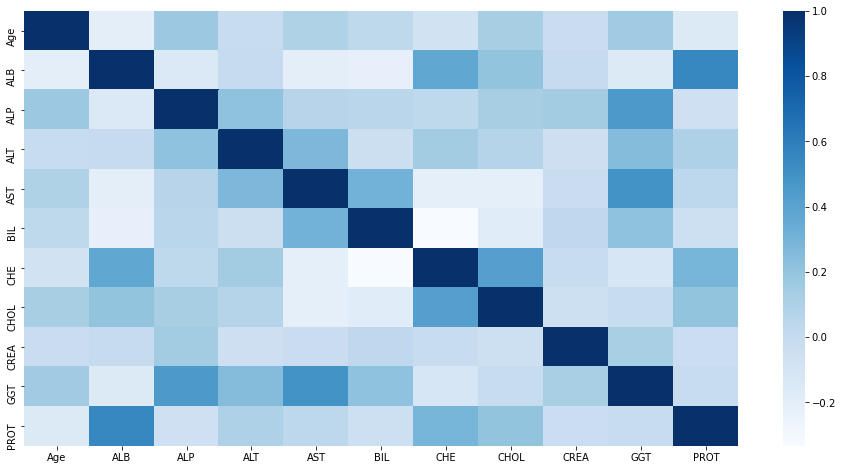

In [53]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),cmap="Blues");

Significant correlation can be seen only between ALB and PROT. This is because albumin is a kind of protein so they are directly proportional.

# Statistical Analysis

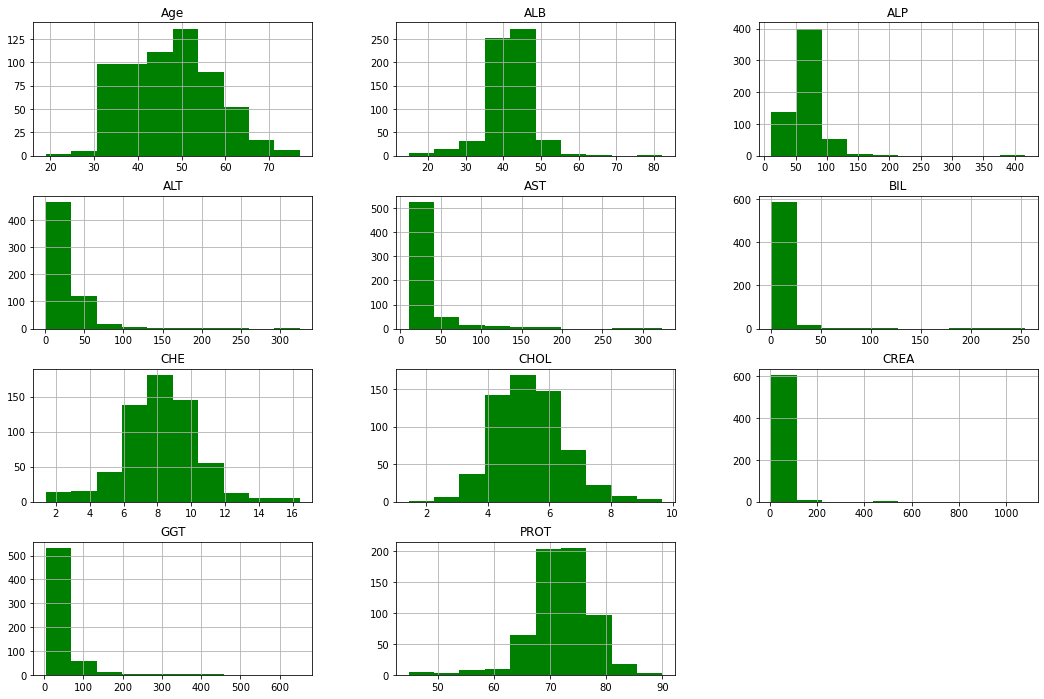

In [54]:
data.hist(figsize=(18,12))
plt.show()

# Multivariate Analysis

From the bivariate analysis conducted above, all columns except creatine and protein influence liver disease, so I will be considering these for multivariate analysis.

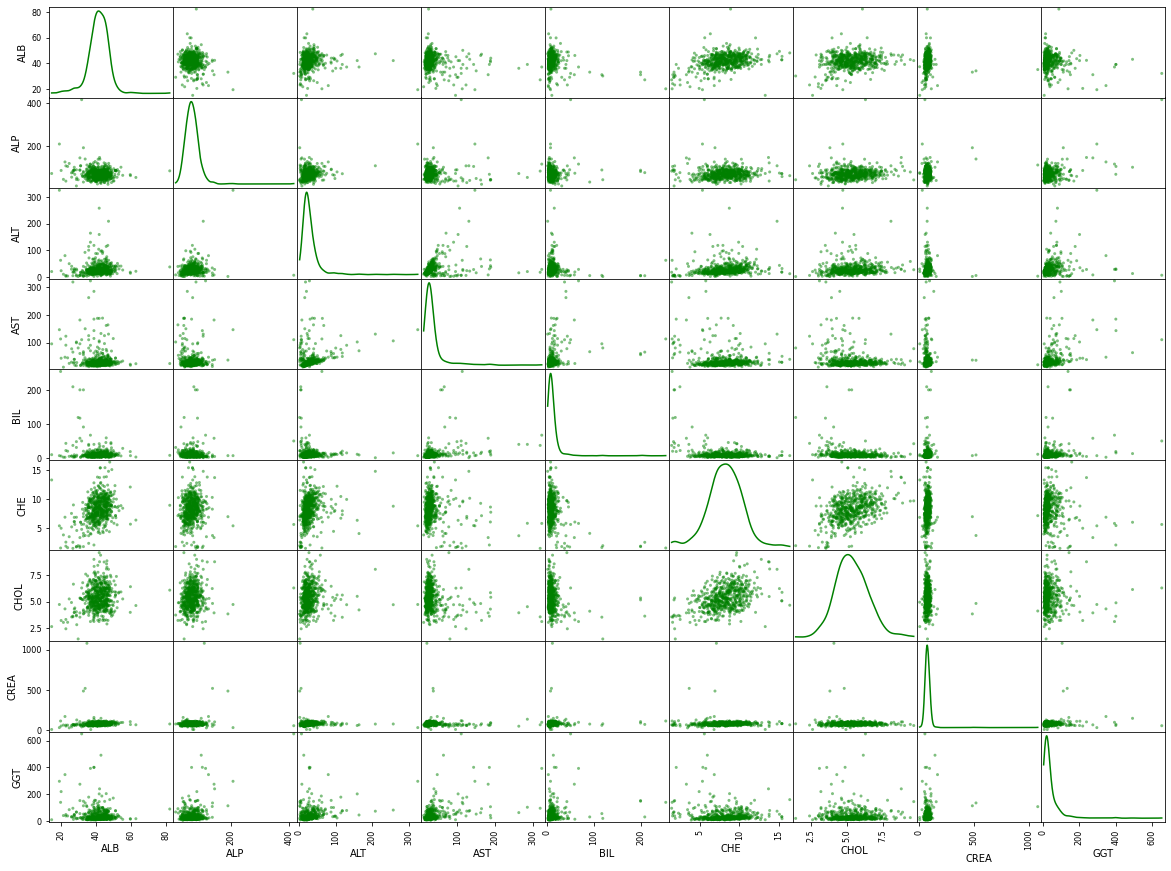

In [55]:
pd.plotting.scatter_matrix(data.loc[:, "ALB":"GGT"], diagonal="kde",figsize=(20,15))
plt.show()

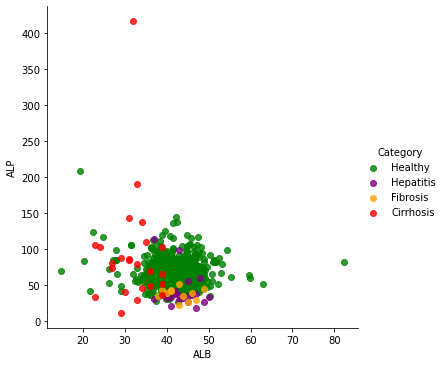

In [56]:
sns.lmplot("ALB", "ALP", data, hue="Category", fit_reg=False);

Lower values of Alkaline phosphatase v Albumin indicate the prevalennce of cirrhosis.

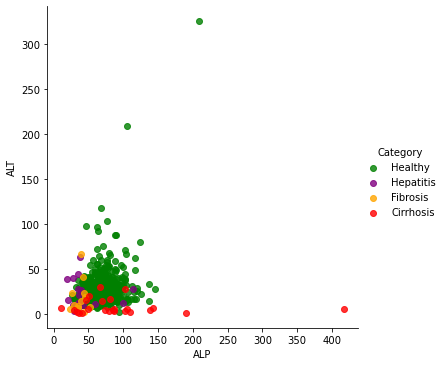

In [57]:
sns.lmplot("ALP", "ALT", data, hue="Category", fit_reg=False);

Lower values of Alanine Transaminase v Alkaline phosphatase indicate the presence of all three liver disorders.

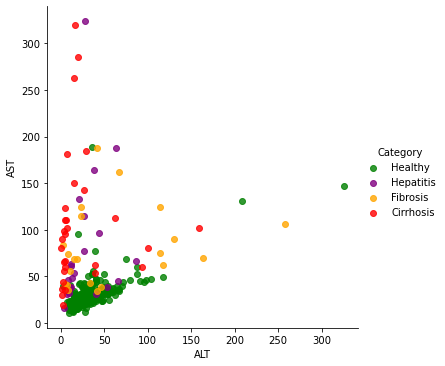

In [58]:
sns.lmplot("ALT", "AST", data, hue="Category", fit_reg=False);

Irrespective of the Aspartate aminotransferase values, low Alanine Transaminase values indicate cirrhosis. Higher values of ALT and AST indicate a higher probability of health.

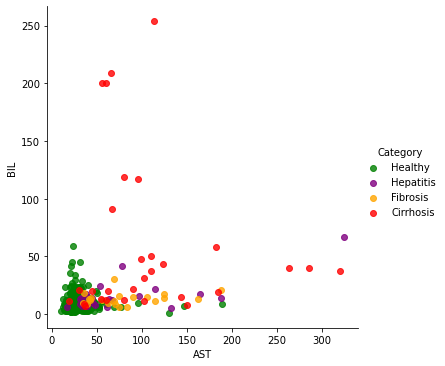

In [59]:
sns.lmplot("AST", "BIL", data, hue="Category", fit_reg=False);

When values of both Bilirubin and Aspartate aminotransferase are under 50, in majority of the cases this means the patient is healthy.

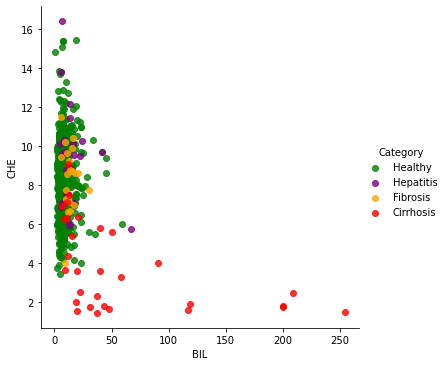

In [60]:
sns.lmplot("BIL", "CHE", data, hue="Category", fit_reg=False);

With increasing values of bilirubin, cirrhosis prevalence increases irrespective of cholinesterase values. As long as bilirubin is low, cirrhosis is ruled out though there is a chance of the patient having fibrosis or hepatitis.

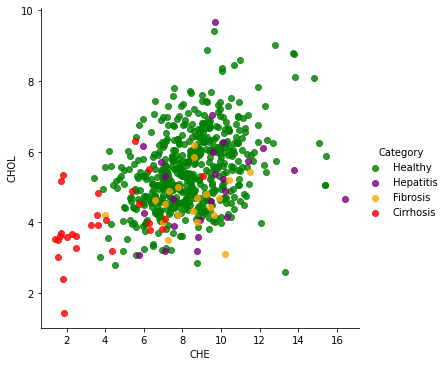

In [61]:
sns.lmplot("CHE", "CHOL", data, hue="Category", fit_reg=False);

Cholinesterase values falling between 6 and 12 while Cholesterol ranges from 3 to 8 can indicate hepatitis. 
Low values of Cholesterol v cholinesterase indicate cirrhosis. 

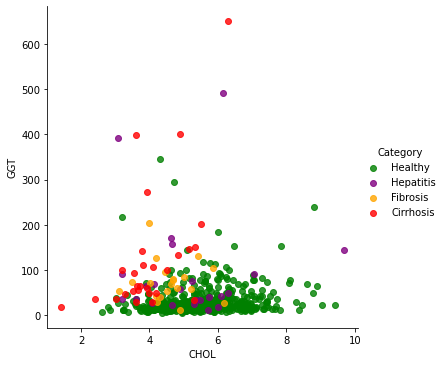

In [62]:
sns.lmplot("CHOL", "GGT", data, hue="Category", fit_reg=False);

Irrespective of Cholesterol values, as long as gamma-glutamyl transferase stays below 100 there is a very high probability of being healthy.

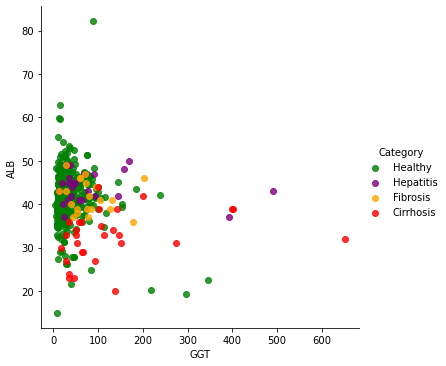

In [63]:
sns.lmplot("GGT", "ALB", data, hue="Category", fit_reg=False);

Irrespective of albumin, as gamma-glutamyl transferase starts getting higher than 50, the prevalence of all liver diseases increases, most significantly hepatitis and fibrosis. 

Assumptions:

Due to the lack of an SME, I was unable to determine whether or not certain unnaturally high values of biological indicators, i.e., the outliers should be removed or imputed. If I had an SME with me, I would have taken their advice to handle the outliers in an appropriate manner that does not hamper my analysis. For the purpose of this project, I assumed that all values are correct and genuine, and that the outliers are natural parts of medical data.

Conclusions:

Each and every biological indicator in this dataset except blood creatine and blood protein level influences both minorly and majorly the prevalence of certain liver diseases.

Prevention is better than cure. After finding out exactly which parameters influence liver diseases, I make the following general recommendations for people to maintain their liver health. Since I am not an SME, I want to emphasise that this is not medical advice. This are general pointers for good health which most of us are already aware of.

1. For maintaining healthy levels of blood albumin, make sure to eat balanced meals with a bit of extra protein if your albumin is low. Don't skip meals.

2. Consume foods rich in zinc for maintaining healthy levels of alkaline phosphatase.

3. Have foods rich in sulphur like fresh fruits and vegetables and exercise regularly for normal alanine transaminase.

4. Quitting alcohol, smoking and losing weight can help in keeping aspartate aminotransferase levels normal.

5. Consuming fibre and staying hydrated is useful for maintaining blood bilirubin.

6. To maintain healthy cholinesterase and cholesterol, eat foods rich in omega 3 fatty acids.Cut back on sugar and foods high in saturated and trans fats.

7. Increase magnesium, glutathione and circumin in the diet and reduce the consumption of red meat for normal levels of gamma glutyl transferase.